# Using the Twitter API & Data Cleaning Techniques
## How happy are people in quarantine?

Below you will find my program that reads a JSON file that you will recieve from the search tweets API, I specifically used Insomnia to do this.

The program takes the data and extracts the names of the tweeters, as well as the text of the tweets themselves. It then cleans the data using the 're' python library (not perfectly cleaned, still room for improvement), and outputs it into a Pandas data frame that shows polarity and subjectivity of the tweets you have submitted.



In [277]:
import json

with open('QTweets(100)(filtered2).json') as f:
  q_tweet = json.load(f)

In [293]:
#Store usernames of tweeters in a list "names"
names = []
for name in q_tweet['statuses']: 
    username = name['user']['screen_name']
    names.append(username)
print(names) #Show all the names of the tweeters

    

['ItsMapleOW', 'OfficialEGO', 'landzo_', 'LadyAnnaD', '13ThatSavageGuy', 'koprav', 'mikaelkingo', 'titaniumtori', 'titaniumtori', 'titaniumtori', 'MikeDancy', 'nessa_ot', 'Aaron_JRobinson', 'QayzK', 'GognaMegha', 'katrinagrace239', 'Unknownrosebabe', 'Red16081', 'angelasmall', 'sapnaprasad_', 'sirserpentine', 'mikikokanovic', 'Simraawr', 'IanCanada01', 'gurleenhayerr', 'HaileyWright97', '0neloveforever_', 'JacquieSpain', 'a_dawg09', 'HABS_Now', 'JMEP33', 'mcleod_carolyn', 'xiaomoon', 'GodBless_Eli', 'GfjHogue', 'WittySmittyNews', 'MaddyMilthorpe', 'alltime_josh', 'mmadisonkennedy', 'matthewsurina', 'StayGoldson_', 'HoserMess', 'ArmoAlice', 'JapjeetSuden', 'theAngrySkeptic', 'gurpreetsidhuPE', 'lavender_gay', 'haydensbuns', 'mcsquizzey', 'koprav', 'iancmclaren', 'jacksonburleyy', 'LevisBecker', 'mgrewal94', 'b_well3', 'andreajollley', 'shesawreckkk', 'DanielleEPhoto', 'Trefl1p', 'ikapai', 'A2Keating', 'WeOutHereGaming', 'ummesalamapotia', 'JNueee', 'sheeniverse', 'sarahobregonn', 'gregc

In [294]:
#Store tweet text in a list "tweet_text"
tweet_text = []
for text in q_tweet['statuses']: 
    transcript = text['full_text']
    tweet_text.append(transcript)
print(tweet_text) #print the text of all the tweets 

['@m2ntara Hey no worries how was the trip to venice before quarantine?', '@Malcolmvelli Nothing. Gimmi 3 months of quarantine.', 'Broken glasses, broken shower curtain rod, everything is breaking and quarantine is getting to me, but I have a listing consult today and that’s a good feeling.', "@howamidointhis @GamblingAvenge1 @robksg3 @TSNRyanRishaug I do not want the borders open, it's a complete 💩 show in America right now, however, do we need 14 day quarantine if players are being tested regularly? Test them and quarantine them for the amount of time it takes to get results back", '@weskeltner @Sequisha @Epiphone I bought a @ESPGuitarsUSA LTD Kirk Hammet signature series back in January, so I’ve been using this quarantine basically to do the same since I haven’t really played since highschool!', '@sandhuamarjot1 @fordnation @celliottability @DrFullertonMPP Do you have designated quarantine centres in west Brampton ?', 'Tune in to “underrated podcast”\nToday at noon - I’ll be talking

In [295]:
#Create a dictionary called "data", where the keys are the usernames and values are the tweets
data = dict(zip(names, tweet_text))

# Pandas Data Frame

Now that we have made a dictionary with the key being the tweeters username and the value as the tweet itself, we will now use Pandas to insert the data into a data frame!

In [281]:
#Create a pandas dataframe for the dictionary we just created

import pandas as pd
pd.set_option('max_colwidth',500)
data_df = pd.DataFrame(data,index=[0]).transpose()
data_df.columns = ['tweet']
data_df

,tweet
ItsMapleOW,@m2ntara Hey no worries how was the trip to venice before quarantine?
OfficialEGO,@Malcolmvelli Nothing. Gimmi 3 months of quarantine.
landzo_,"Broken glasses, broken shower curtain rod, everything is breaking and quarantine is getting to me, but I have a listing consult today and that’s a good feeling."
LadyAnnaD,"@howamidointhis @GamblingAvenge1 @robksg3 @TSNRyanRishaug I do not want the borders open, it's a complete 💩 show in America right now, however, do we need 14 day quarantine if players are being tested regularly? Test them and quarantine them for the amount of time it takes to get results back"
13ThatSavageGuy,"@weskeltner @Sequisha @Epiphone I bought a @ESPGuitarsUSA LTD Kirk Hammet signature series back in January, so I’ve been using this quarantine basically to do the same since I haven’t really played since highschool!"
koprav,@patrickbrownont do you have designated quarantine centres in Brampton ?
mikaelkingo,Tune in to “underrated podcast”\nToday at noon - I’ll be talking about life in quarantine but most of all my favorite subject Hockey!
titaniumtori,@coffeespoonie I wasn't specifically taking about quarantine protesters either. I was referring to protesters that protest just to protest as well as any other protest that would be deemed inappropriate.
MikeDancy,"@mattgallowaycbc I was never invited to any bubbles before the quarantine. I’m sure I won’t be invited to any now. And I’m okay with that. I have my dog, that’s all that matters."
nessa_ot,Summer is here and it’s so hot. We have finally reached the quarantine stage of wearing no clothes.


# Cleaning The Data

We will now begin cleaning the data through 3 total rounds, I have commented the code segments for you to understand (hopefully). As you may see the cleaning isn't perfect as I am still learning different ways to clean data, but it's a start for sure!

In [296]:
# Apply a first round of text cleaning techniques
import re
import string
#from wordsegment import load, segment
#load()



def clean_text_round1(text):
    'Lets lowercase the words, remove puncation and remove any numbers as well'
   # text = ' '.join(segment(text)) #splits hashtags into real words
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE) #Remove HTTPS links
    text = text.lower() #make all words lowercase
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text) #remove numbers
    return text

round1 = lambda x: clean_text_round1(x)

In [297]:
data_clean = pd.DataFrame(data_df.tweet.apply(round1))
data_clean

,tweet
ItsMapleOW,hey no worries how was the trip to venice before quarantine
OfficialEGO,malcolmvelli nothing gimmi months of quarantine
landzo_,broken glasses broken shower curtain rod everything is breaking and quarantine is getting to me but i have a listing consult today and that’s a good feeling
LadyAnnaD,howamidointhis tsnryanrishaug i do not want the borders open its a complete 💩 show in america right now however do we need day quarantine if players are being tested regularly test them and quarantine them for the amount of time it takes to get results back
13ThatSavageGuy,weskeltner sequisha epiphone i bought a espguitarsusa ltd kirk hammet signature series back in january so i’ve been using this quarantine basically to do the same since i haven’t really played since highschool
koprav,patrickbrownont do you have designated quarantine centres in brampton
mikaelkingo,tune in to “underrated podcast”\ntoday at noon i’ll be talking about life in quarantine but most of all my favorite subject hockey
titaniumtori,coffeespoonie i wasnt specifically taking about quarantine protesters either i was referring to protesters that protest just to protest as well as any other protest that would be deemed inappropriate
MikeDancy,mattgallowaycbc i was never invited to any bubbles before the quarantine i’m sure i won’t be invited to any now and i’m okay with that i have my dog that’s all that matters
nessa_ot,summer is here and it’s so hot we have finally reached the quarantine stage of wearing no clothes


In [299]:
# Apply a second round of text cleaning techniques, removing most emojis
import re




def strip_emoji(text):
    RE_EMOJI = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return RE_EMOJI.sub(r'', text)

round2 = lambda x: strip_emoji(x)

In [285]:
data_clean = pd.DataFrame(data_clean.tweet.apply(round2))
data_clean

,tweet
ItsMapleOW,hey no worries how was the trip to venice before quarantine
OfficialEGO,malcolmvelli nothing gimmi months of quarantine
landzo_,broken glasses broken shower curtain rod everything is breaking and quarantine is getting to me but i have a listing consult today and that’s a good feeling
LadyAnnaD,howamidointhis tsnryanrishaug i do not want the borders open its a complete show in america right now however do we need day quarantine if players are being tested regularly test them and quarantine them for the amount of time it takes to get results back
13ThatSavageGuy,weskeltner sequisha epiphone i bought a espguitarsusa ltd kirk hammet signature series back in january so i’ve been using this quarantine basically to do the same since i haven’t really played since highschool
koprav,patrickbrownont do you have designated quarantine centres in brampton
mikaelkingo,tune in to “underrated podcast”\ntoday at noon i’ll be talking about life in quarantine but most of all my favorite subject hockey
titaniumtori,coffeespoonie i wasnt specifically taking about quarantine protesters either i was referring to protesters that protest just to protest as well as any other protest that would be deemed inappropriate
MikeDancy,mattgallowaycbc i was never invited to any bubbles before the quarantine i’m sure i won’t be invited to any now and i’m okay with that i have my dog that’s all that matters
nessa_ot,summer is here and it’s so hot we have finally reached the quarantine stage of wearing no clothes


In [300]:
# Apply a third and final round of cleaning
def clean_text_round3(text):
    text = re.sub('[‘’“”…]', '', text) #remove more puncuation
    text = re.sub('\n', '', text) #remove \n from the text
    return text

round3 = lambda x: clean_text_round3(x)

In [301]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.tweet.apply(round3))
data_clean

,tweet
ItsMapleOW,hey no worries how was the trip to venice before quarantine
OfficialEGO,malcolmvelli nothing gimmi months of quarantine
landzo_,broken glasses broken shower curtain rod everything is breaking and quarantine is getting to me but i have a listing consult today and thats a good feeling
LadyAnnaD,howamidointhis tsnryanrishaug i do not want the borders open its a complete 💩 show in america right now however do we need day quarantine if players are being tested regularly test them and quarantine them for the amount of time it takes to get results back
13ThatSavageGuy,weskeltner sequisha epiphone i bought a espguitarsusa ltd kirk hammet signature series back in january so ive been using this quarantine basically to do the same since i havent really played since highschool
koprav,patrickbrownont do you have designated quarantine centres in brampton
mikaelkingo,tune in to underrated podcasttoday at noon ill be talking about life in quarantine but most of all my favorite subject hockey
titaniumtori,coffeespoonie i wasnt specifically taking about quarantine protesters either i was referring to protesters that protest just to protest as well as any other protest that would be deemed inappropriate
MikeDancy,mattgallowaycbc i was never invited to any bubbles before the quarantine im sure i wont be invited to any now and im okay with that i have my dog thats all that matters
nessa_ot,summer is here and its so hot we have finally reached the quarantine stage of wearing no clothes


# Word Counts

This code segment is a work in progress but it shows the word count of the most used words in all of the tweets.

            0    1
0  quarantine  185
1          im   29
2        like   22
3        back   18
4         day   14
5        time   14
6      people   14
7        need   13
8         get   13
9         ive   13


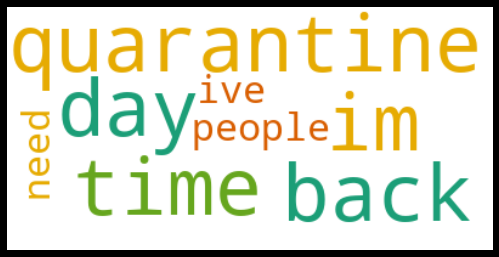

In [292]:
#From https://stackoverflow.com/questions/40206249/count-of-most-popular-words-in-a-pandas-dataframe?rq=1
import nltk
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib
import matplotlib.pyplot as plt

top_N = 10

stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (data_clean.tweet
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)
# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N))
print(rslt)
# plot


wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42).generate(str(rslt))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.subplot(3, 4, index+1)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
    
plt.show()

# Sentiment Analysis

We are now at the spot I made this program for, understanding how people are feeling durng quarantine! We will be using the TextBlob library which allows us to calculate polarity (-1 to 1, 1 being happy and -1 being sad), as well as subjectivity (-1 to 1 as well). We will add two more columns to our data frame to show these values.

In [289]:
from textblob import TextBlob
data_sentiment = data_clean.copy()
pd.set_option('display.max_rows', 500)
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_sentiment['polarity'] = data_sentiment['tweet'].apply(pol)
data_sentiment['subjectivity'] = data_sentiment['tweet'].apply(sub)
data_sentiment

,tweet,polarity,subjectivity
ItsMapleOW,hey no worries how was the trip to venice before quarantine,0.000000,0.000000
OfficialEGO,malcolmvelli nothing gimmi months of quarantine,0.000000,0.000000
landzo_,broken glasses broken shower curtain rod everything is breaking and quarantine is getting to me but i have a listing consult today and thats a good feeling,-0.033333,0.466667
LadyAnnaD,howamidointhis tsnryanrishaug i do not want the borders open its a complete show in america right now however do we need day quarantine if players are being tested regularly test them and quarantine them for the amount of time it takes to get results back,0.077143,0.302527
13ThatSavageGuy,weskeltner sequisha epiphone i bought a espguitarsusa ltd kirk hammet signature series back in january so ive been using this quarantine basically to do the same since i havent really played since highschool,0.066667,0.108333
koprav,patrickbrownont do you have designated quarantine centres in brampton,0.000000,0.000000
mikaelkingo,tune in to underrated podcasttoday at noon ill be talking about life in quarantine but most of all my favorite subject hockey,0.083333,0.708333
titaniumtori,coffeespoonie i wasnt specifically taking about quarantine protesters either i was referring to protesters that protest just to protest as well as any other protest that would be deemed inappropriate,-0.125000,0.375000
MikeDancy,mattgallowaycbc i was never invited to any bubbles before the quarantine im sure i wont be invited to any now and im okay with that i have my dog thats all that matters,0.500000,0.694444
nessa_ot,summer is here and its so hot we have finally reached the quarantine stage of wearing no clothes,0.125000,0.925000


Above you can see all of the polarity ratings for each tweet, one thing I am concerned/confuesed about it how there are so many values that are 0.000000, I will have to figure this out later!

In [290]:
print('Average polarity for quarantine related tweets = ',data_sentiment['polarity'].mean())
print('Average subjectivity for quarantine related tweets = ',data_sentiment['subjectivity'].mean())
print(data_sentiment.isin([0]).sum()) 

Average polarity for quarantine related tweets =  0.06834871881498866
Average subjectivity for quarantine related tweets =  0.3774090501405316
tweet            0
polarity        69
subjectivity    52
dtype: int64


The 'tweet', 'polarity' and 'subjectivity' thing you see is the number of 0.000000 values there are in the data frame. 

This is the program so far, I will be surely continuting this to understand why there are 0.00000 values at all, as well as more cleaning methods, thanks for running the program!